In [ ]:
pip install import-ipynb

In [24]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [51]:
import numpy as np
import pandas as pd
#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#machine learning et Méthodes statistiques
import statsmodels.api as sm
#Désactiver les avertissements inutiles si nécessaire
import warnings

In [81]:
# importation de base des donneés de 2019-01-01 00:00:00 à 2022-11-29 12:45:00 
import CreationData as cr
df = cr.dataframe()

le nombre de NaN sur data2019 est :  0
le nombre de NaN sur data2020 est :  0
le nombre de NaN sur data2021 est :  0
le nombre de NaN sur data2022HALF1 est :  0
le nombre de NaN sur data2022HALF2 est :  0


In [13]:
df.head(3)

,Consommation (MW)
Temps,
2019-01-01 00:00:00,64207.0
2019-01-01 00:15:00,63684.5
2019-01-01 00:30:00,63162.0


In [14]:
df.tail(3)

,Consommation (MW)
Temps,
2022-11-29 12:15:00,63790.0
2022-11-29 12:30:00,63155.0
2022-11-29 12:45:00,62611.0


<AxesSubplot:xlabel='Temps'>

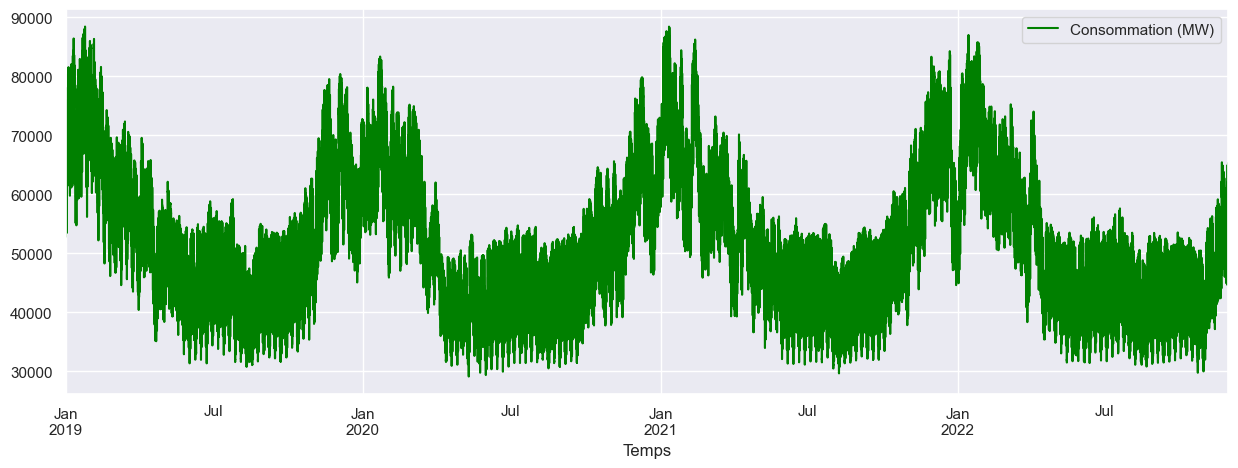

In [34]:
df.plot(figsize=(15,5),xlabel='Temps',color='green')

In [17]:
## Diviser les données en data test et data train 
data_test = df.iloc[-35880:,:].copy() # 20%
data_train = df.iloc[:-35880].copy()  # 80%

In [25]:
#Unobserved Components model definition
model_UC1 = sm.tsa.UnobservedComponents(df,
                                        level='dtrend',
                                        irregular=True,
                                        stochastic_level = False,
                                        stochastic_trend = False,
                                        stochastic_freq_seasonal = [False, False, False],
                                        freq_seasonal=[{'period': 672, 'harmonics': 1},
                                                       {'period': 2880, 'harmonics': 1},
                                                       {'period': 35066, 'harmonics': 2}])

In [27]:
# essayage du modèle aux données du train data
model_UC1res = model_UC1.fit()

In [29]:
#print statsmodels summary pour le modèle 
print(model_UC1res.summary())

                            Unobserved Components Results                            
Dep. Variable:             Consommation (MW)   No. Observations:               137140
Model:                   deterministic trend   Log Likelihood            -1397309.307
                     + freq_seasonal(672(1))   AIC                        2794620.613
                    + freq_seasonal(2880(1))   BIC                        2794630.442
                   + freq_seasonal(35066(2))   HQIC                       2794623.554
Date:                       Wed, 30 Nov 2022                                         
Time:                               01:58:34                                         
Sample:                           01-01-2019                                         
                                - 11-29-2022                                         
Covariance Type:                         opg                                         
                       coef    std err          z     

In [37]:
#modèle de prédiction 
forecast_UC1 = model_UC1res.forecast(steps=35880)


In [38]:
#calculating mean absolute error and root mean squared error for out-of-sample prediction for model evaluation
error = np.sqrt(np.mean([(data_test.iloc[x,:] - forecast_UC1[x]) ** 2 for x in range(len(forecast_UC1))]))      
print(f"Out-of-sample root mean squared error (RMSE): {'%.0f' % error}")

Out-of-sample root mean squared error (RMSE): 8392


# 1-Pour tester la validation du modèle :

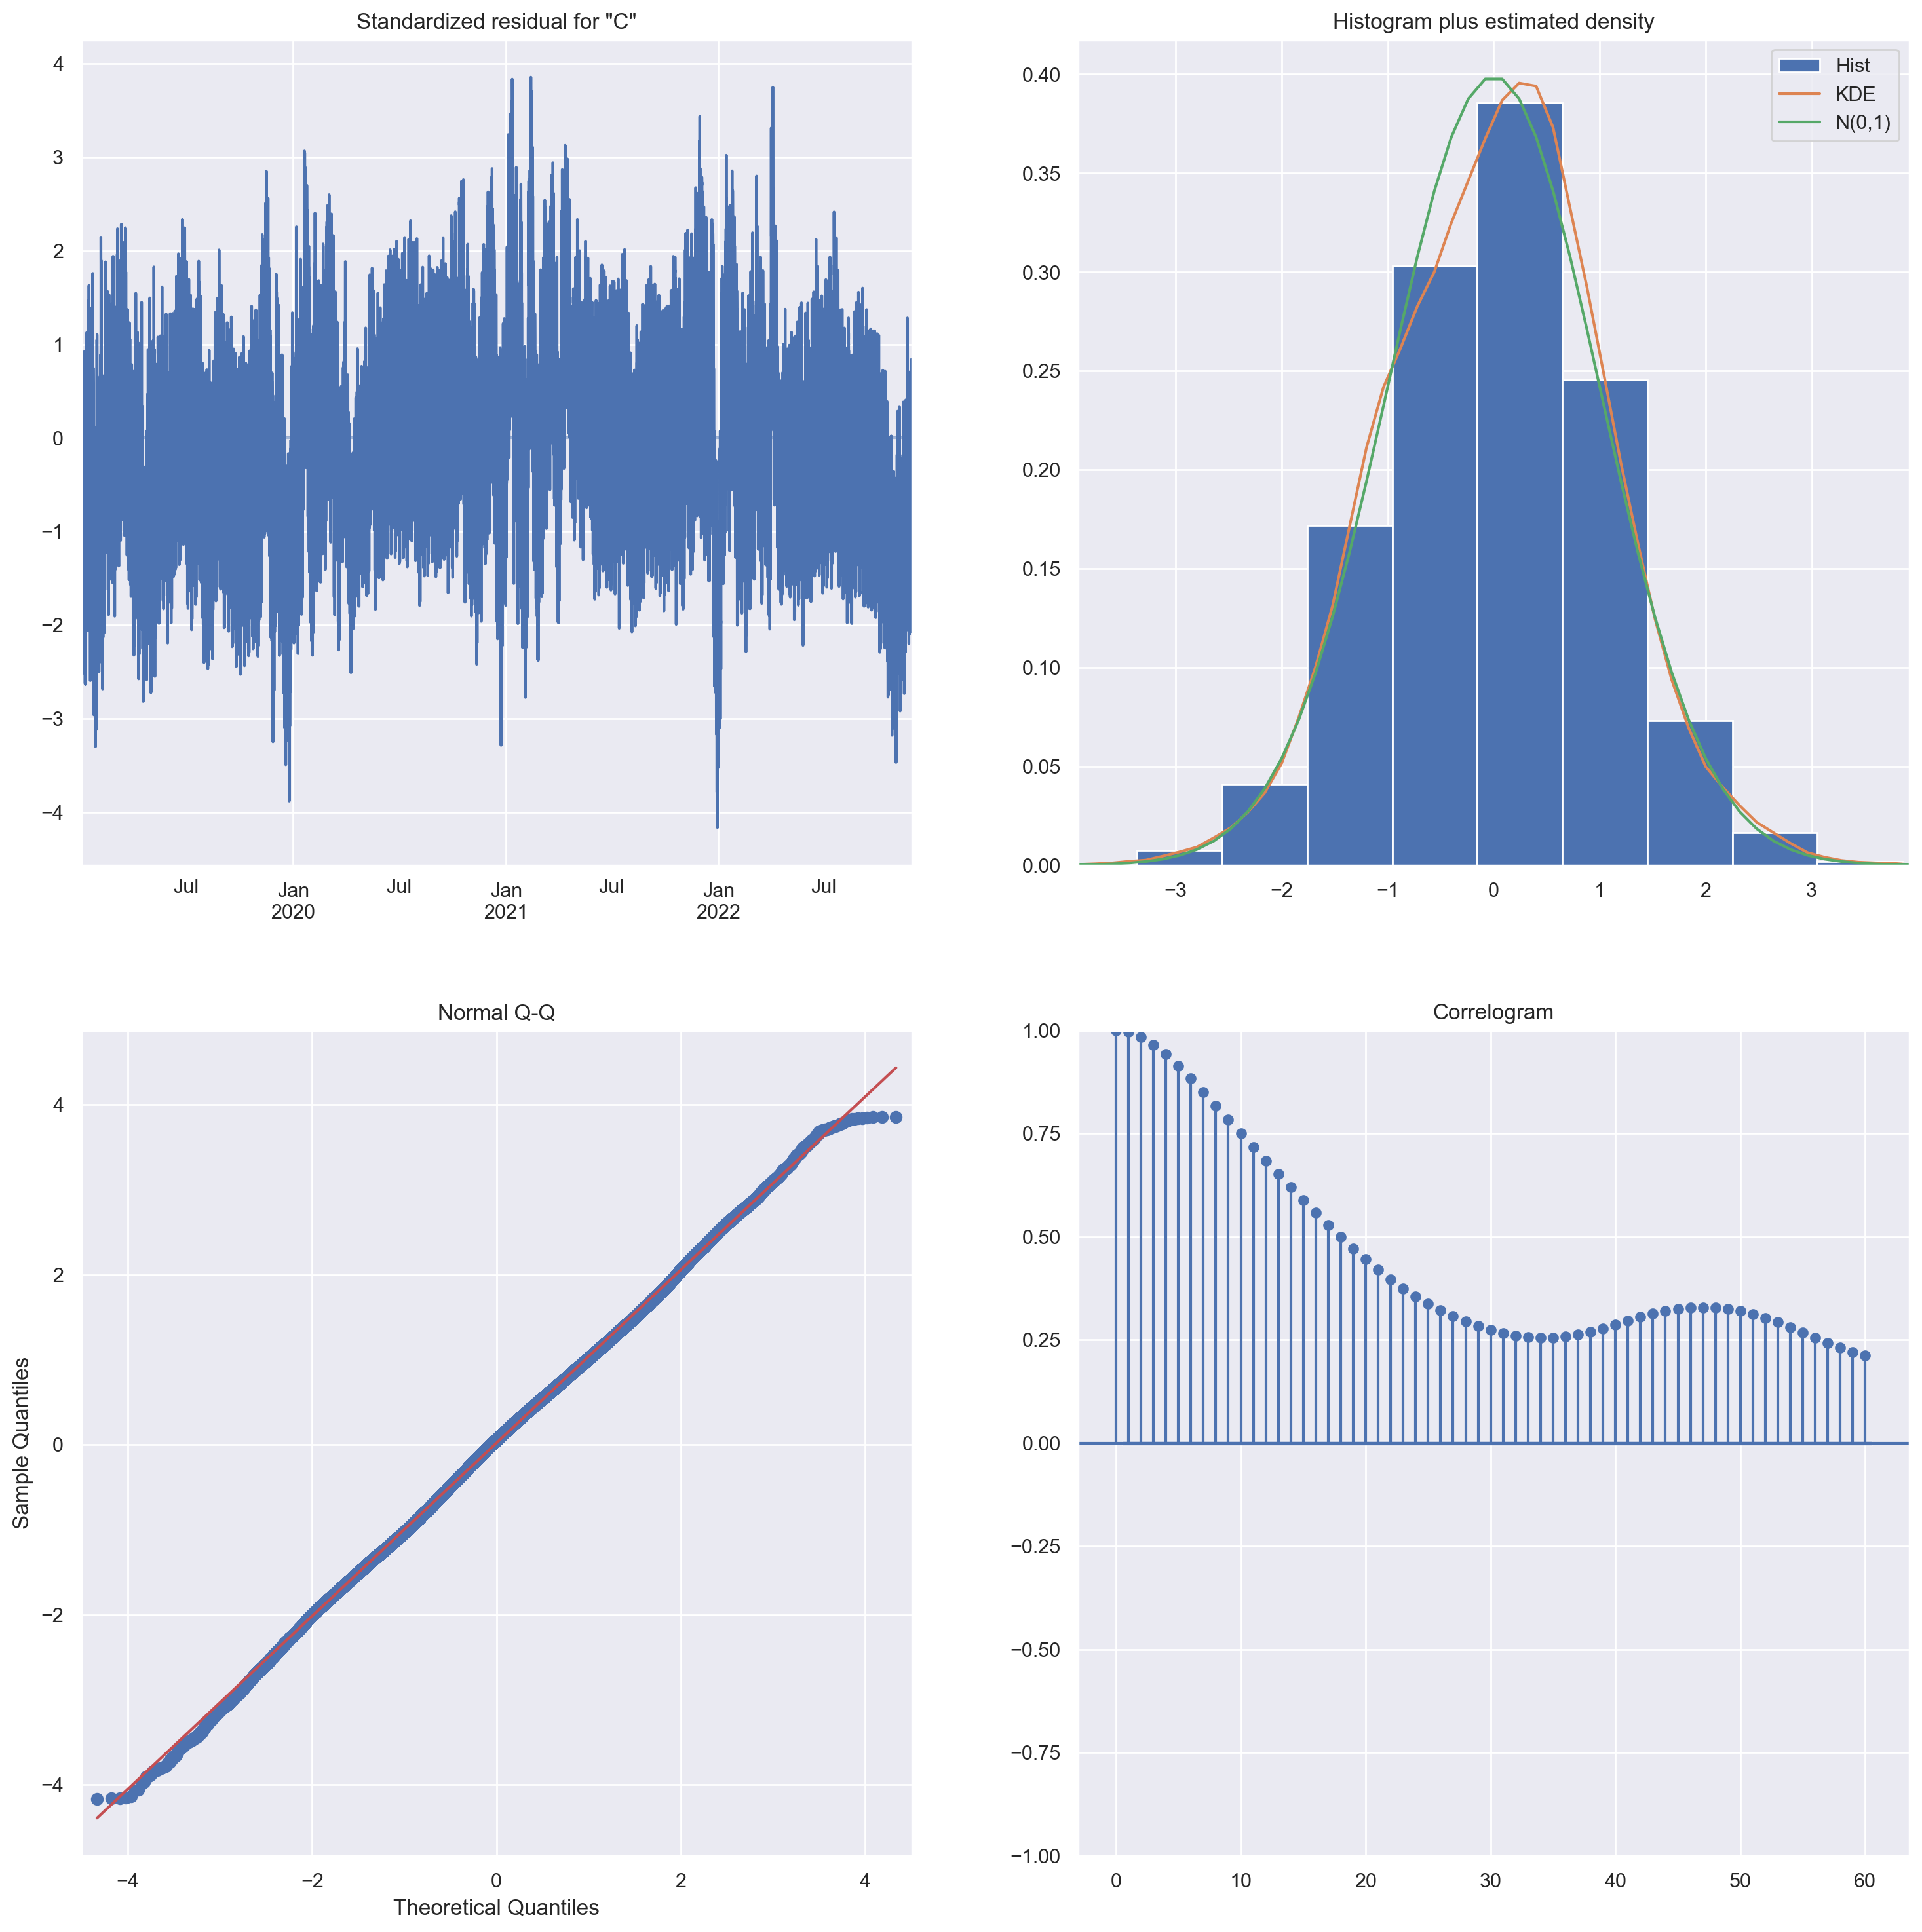

In [83]:
# Tracé les diagnostics résiduels du modèle Unobserved Components
model_UC1res.plot_diagnostics(figsize=(18,18),lags=60).set_dpi(200);
plt.show();

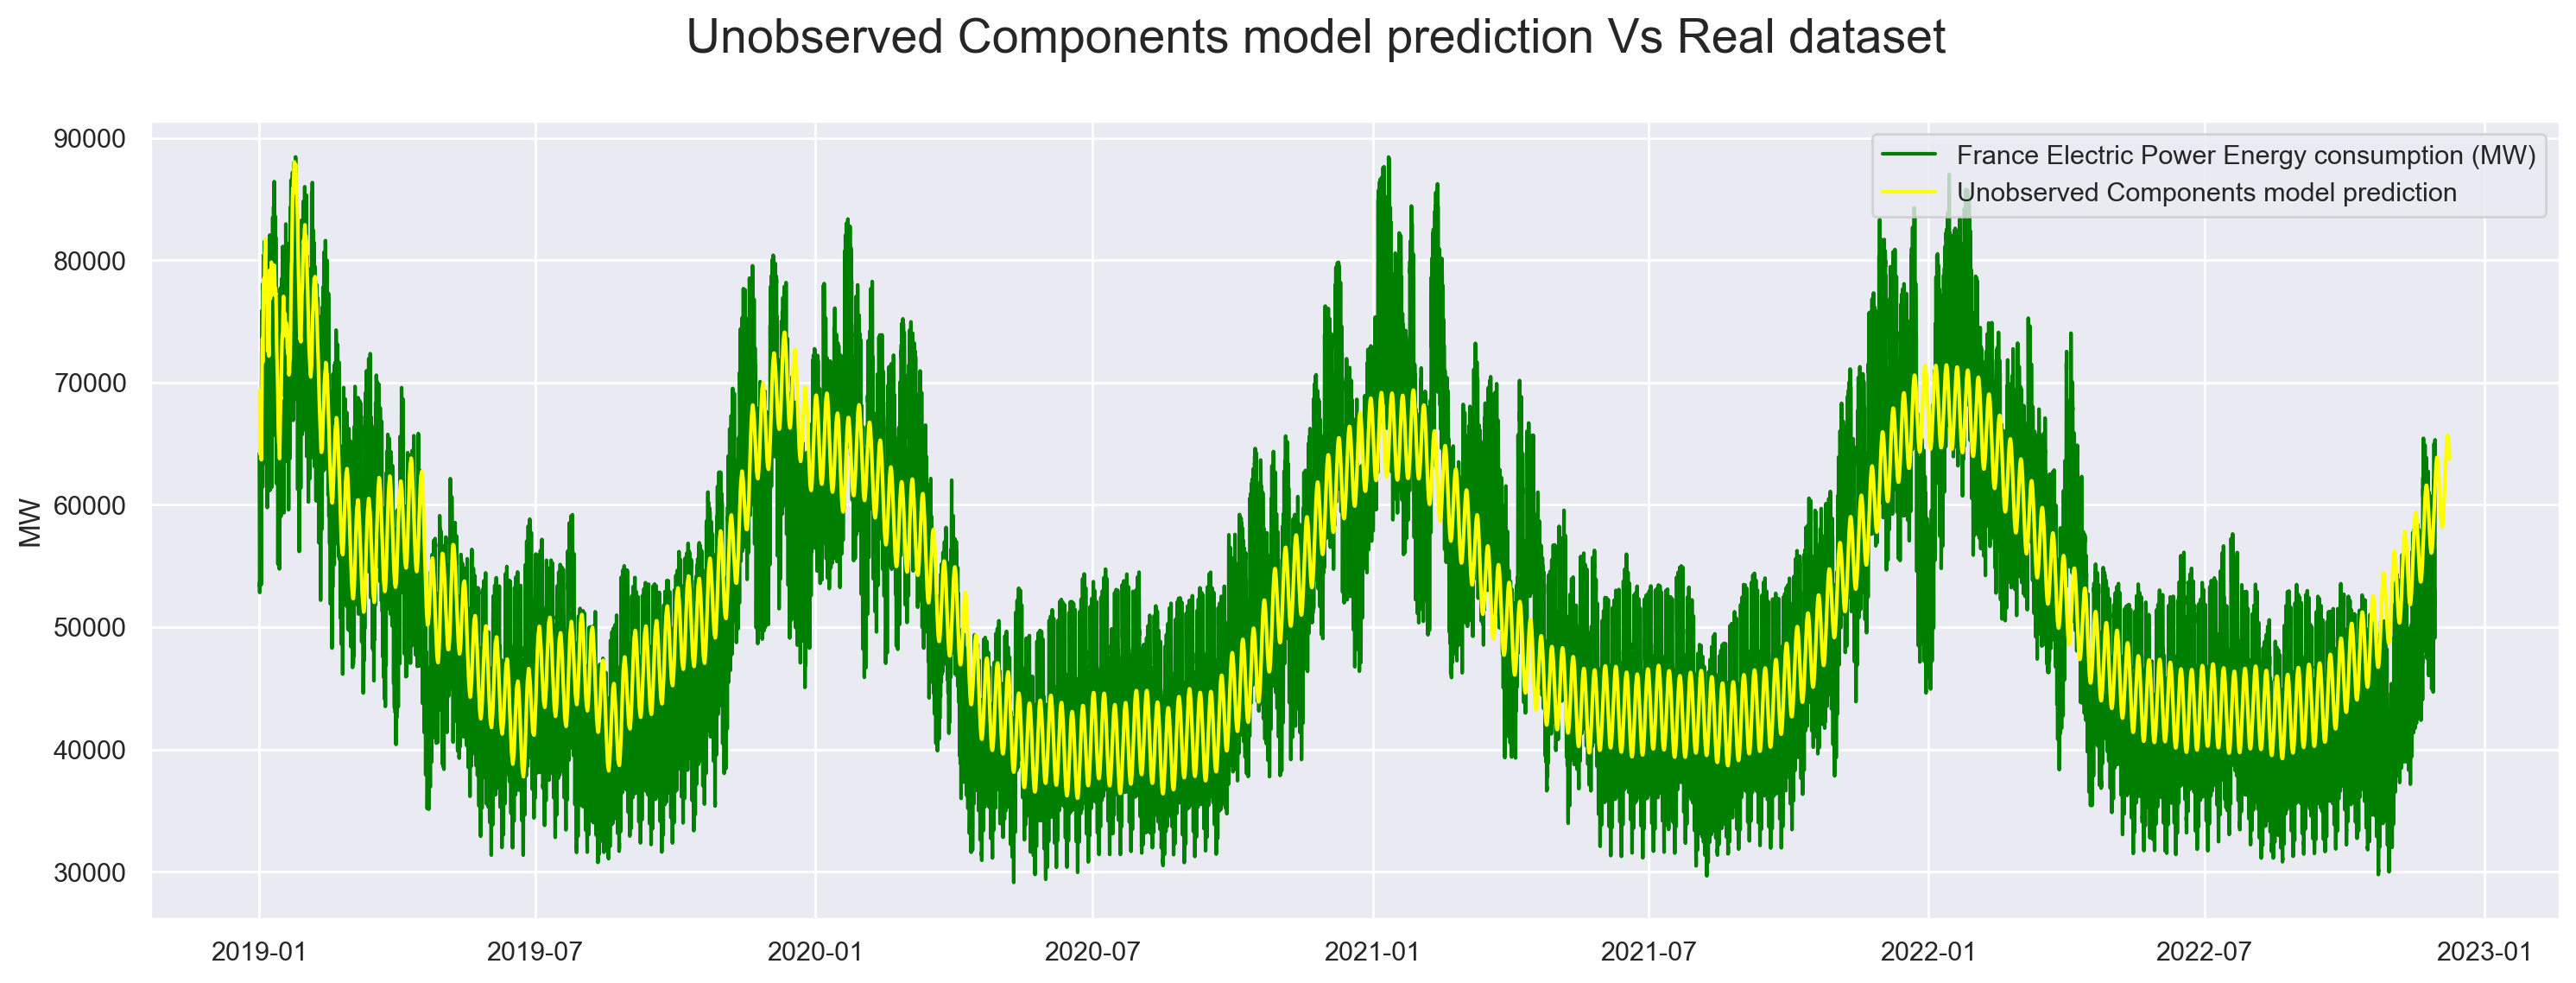

In [77]:
pred = model_UC1res.predict(start="2019-01-01 06:00:00", end="2022-12-08 23:45:00")
f = plt.figure(figsize=(18,6),dpi=200);
#setting title and size of title
plt.suptitle('Unobserved Components model prediction Vs Real dataset', fontsize=20);
#setting y axis label
plt.ylabel('MW');
#plotting the data original 
plt.plot(df, label='France Electric Power Energy consumption (MW)',color='green');
#plotting linear model
plt.plot(pred, label='Unobserved Components model prediction',color='yellow');

plt.legend();


# 2- La prédiction du jour 8 décembre :

In [67]:
#la prédiction du jour 8 décembre 2022
forcast = model_UC1res.predict(start="2022-12-08 00:00:00", end="2022-12-08 23:45:00")
forcast = forcast.to_frame()
forcast.rename(columns = {'predicted_mean':'Consommation (MW)'},inplace = True)
pd.options.display.max_rows = None
forcast

,Consommation (MW)
2022-12-08 00:00:00,65586.297783
2022-12-08 00:15:00,65578.121852
2022-12-08 00:30:00,65569.669157
2022-12-08 00:45:00,65560.940627
2022-12-08 01:00:00,65551.937217
2022-12-08 01:15:00,65542.659904
2022-12-08 01:30:00,65533.109690
2022-12-08 01:45:00,65523.287599
2022-12-08 02:00:00,65513.194682
2022-12-08 02:15:00,65502.832009
